### load and prepare the stock price data

In [17]:
# 0 — Add src folder to path
import sys
from pathlib import Path

# Assuming your notebook is in /Notebooks/ and src is at the project root
project_root = Path.cwd().parent  # adjust if notebook is deeper
src_path = project_root / "src"
sys.path.append(str(src_path))

print("src path added:", src_path)


src path added: c:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\src


In [18]:
import sys
import site

print("Python executable:", sys.executable)
print("\nSite-packages paths:")
for p in site.getsitepackages():
    print(" -", p)

print("\nNumpy version check:")
import numpy as np
print(np.__version__)


Python executable: c:\Users\User\Desktop\KAIM\week_1\.venv\Scripts\python.exe

Site-packages paths:
 - c:\Users\User\Desktop\KAIM\week_1\.venv
 - c:\Users\User\Desktop\KAIM\week_1\.venv\Lib\site-packages

Numpy version check:
1.26.4


In [19]:
import talib
import numpy as np

print("TA-Lib version:", talib.__version__)
print("NumPy version:", np.__version__)


TA-Lib version: 0.4.28
NumPy version: 1.26.4


In [20]:
import sys
import os

# Get absolute path to src
src_path = os.path.join(os.getcwd(), "src")
print("SRC path:", src_path)

# Add to Python search path
if src_path not in sys.path:
    sys.path.append(src_path)


SRC path: c:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\notebooks\src


In [21]:
import sys
import os

# 1️⃣ Get project root (one level up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("Project root:", project_root)

# 2️⃣ Add src folder to Python path
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)
print("SRC path added to sys.path:", src_path)

# 3️⃣ Import your module
from quant_analysis import load_stock_data

# 4️⃣ Set path to CSV
stock_csv_path = os.path.join(project_root, "Data", "yfinance_data", "AAPL.csv")

# 5️⃣ Load the stock data
df_stock = load_stock_data(stock_csv_path)

# 6️⃣ Preview
df_stock.head()


Project root: c:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1
SRC path added to sys.path: c:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\src


,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [22]:
# 4 Quick summary statistics
print(df_stock.describe())

             Close         High          Low         Open        Volume
count  3774.000000  3774.000000  3774.000000  3774.000000  3.774000e+03
mean     53.841169    54.383801    53.247465    53.801628  2.640640e+08
std      55.064042    55.627235    54.440128    55.009182  2.345629e+08
min       2.345299     2.459265     2.345299     2.380989  2.404830e+07
25%      15.050355    15.183043    14.901886    15.007580  9.581845e+07
50%      26.975808    27.168844    26.836844    27.010205  1.667348e+08
75%      74.664204    75.252383    73.553555    74.127927  3.777410e+08
max     196.256592   197.752460   195.156944   196.167437  1.880998e+09


In [23]:
import talib
import numpy as np

In [24]:
import sys
print(sys.version)

3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]


In [25]:
# Check for missing values
print(df_stock.isna().sum())


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [26]:
# Ensure correct data types
import pandas as pd
df_stock[['Open','High','Low','Close','Volume']] = df_stock[['Open','High','Low','Close','Volume']].apply(pd.to_numeric)


In [27]:
# Check for duplicate rows
print(df_stock.index.duplicated().sum())  # should be 0


0


In [28]:
# Sort by date
df_stock.sort_index(inplace=True)

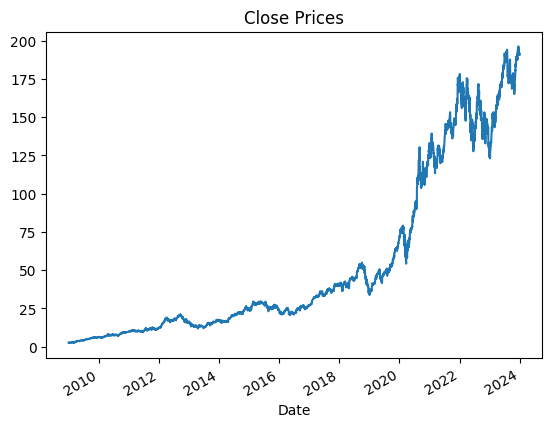

In [29]:
# Check for outliers
import matplotlib.pyplot as plt
df_stock['Close'].plot(title='Close Prices')
plt.show()


In [30]:
# for handling outliers
# I used Smooth with rolling average
df_stock['Close_SMA_5'] = df_stock['Close'].rolling(window=5).mean()
df_stock['Close_SMA_20'] = df_stock['Close'].rolling(window=20).mean()


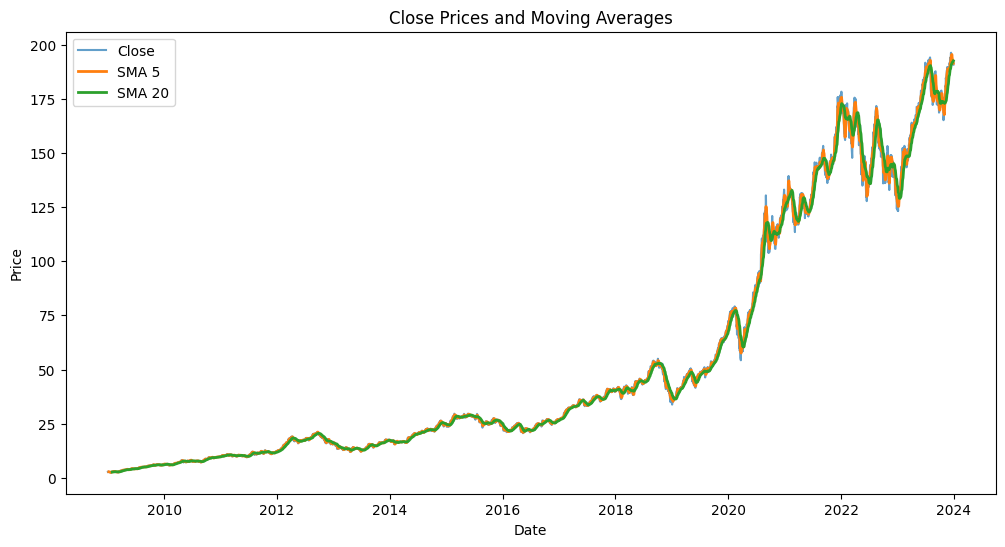

In [31]:

# Plot original Close
plt.figure(figsize=(12,6))
plt.plot(df_stock['Close'], label='Close', alpha=0.7)

# Plot smoothed SMA (5 and 20)
plt.plot(df_stock['Close_SMA_5'], label='SMA 5', linewidth=2)
plt.plot(df_stock['Close_SMA_20'], label='SMA 20', linewidth=2)

plt.title('Close Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


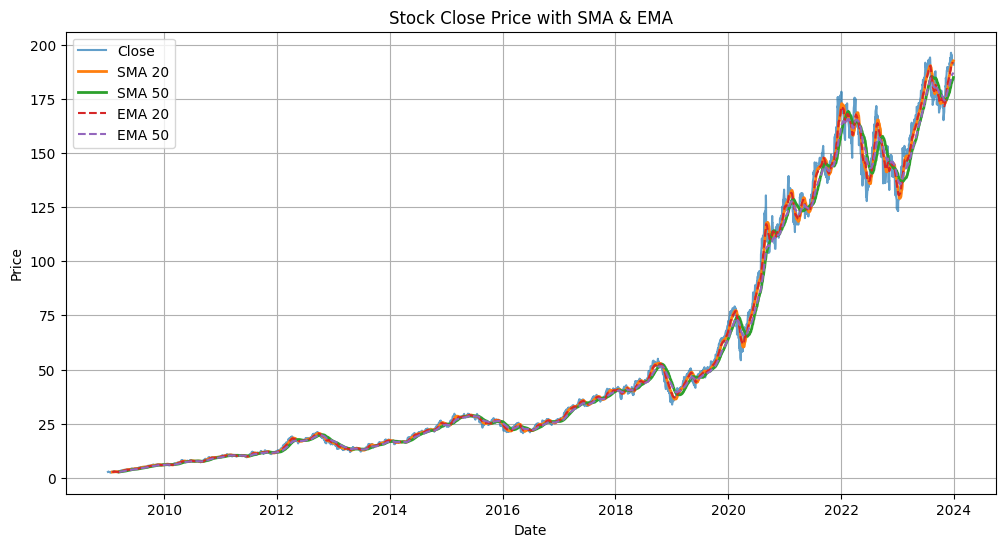

In [38]:
# If not already done, import your function
from quant_analysis import apply_talib_indicators

# Apply TA-Lib indicators to your stock data
df_stock = apply_talib_indicators(df_stock)

# Now the SMA_20, SMA_50, EMA_20, EMA_50 columns exist
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_stock['Close'], label='Close', alpha=0.7)
plt.plot(df_stock['SMA_20'], label='SMA 20', linewidth=2)
plt.plot(df_stock['SMA_50'], label='SMA 50', linewidth=2)
plt.plot(df_stock['EMA_20'], label='EMA 20', linestyle='--')
plt.plot(df_stock['EMA_50'], label='EMA 50', linestyle='--')

plt.title('Stock Close Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [39]:
from quant_analysis import apply_talib_indicators

# Apply TA-Lib indicators to your stock data
df_stock = apply_talib_indicators(df_stock)


In [40]:
print(df_stock.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Close_SMA_5', 'Close_SMA_20',
       'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_signal',
       'MACD_hist'],
      dtype='object')


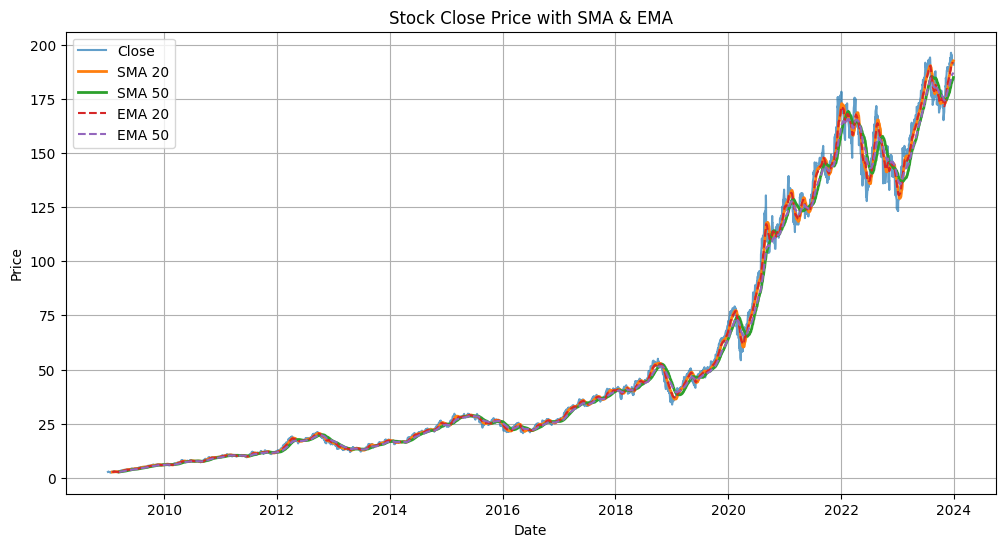

In [41]:
# Close Price with SMA & EMA
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_stock['Close'], label='Close', alpha=0.7)
plt.plot(df_stock['SMA_20'], label='SMA 20', linewidth=2)
plt.plot(df_stock['SMA_50'], label='SMA 50', linewidth=2)
plt.plot(df_stock['EMA_20'], label='EMA 20', linestyle='--')
plt.plot(df_stock['EMA_50'], label='EMA 50', linestyle='--')

plt.title('Stock Close Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


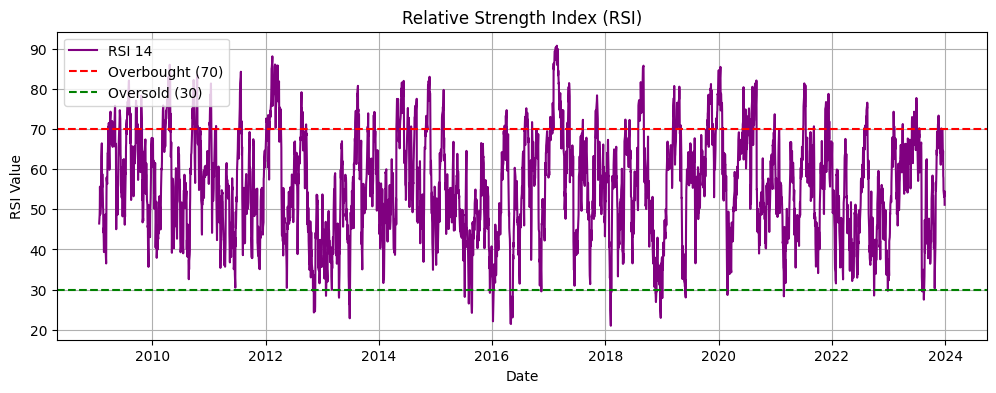

In [42]:
# RSI (Relative Strength Index)
# RSI > 70 → overbought, RSI < 30 → oversold.
plt.figure(figsize=(12,4))
plt.plot(df_stock['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [43]:
from quant_analysis import apply_talib_indicators

# Apply indicators (this creates SMA, EMA, RSI, MACD, etc.)
df_stock = apply_talib_indicators(df_stock)

# Optional: check columns
print(df_stock.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Close_SMA_5', 'Close_SMA_20',
       'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_signal',
       'MACD_hist'],
      dtype='object')


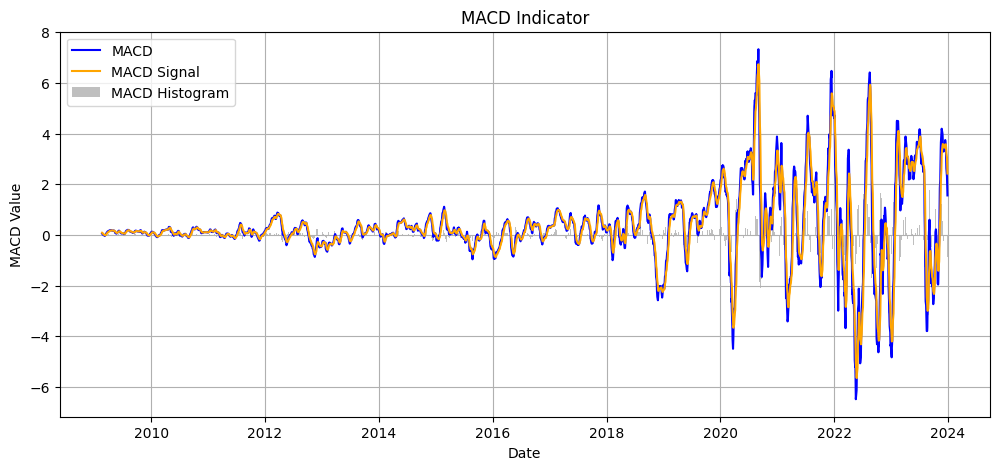

In [44]:
# MACD
# MACD shows momentum and potential trend changes; crossovers signal buy/sell points.
plt.figure(figsize=(12,5))
plt.plot(df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(df_stock.index, df_stock['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)

plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(3, 1, figsize=(14,12), sharex=True)

# # --- 1. Close Price with SMA & EMA ---
# axes[0].plot(df_stock['Close'], label='Close', alpha=0.7)
# axes[0].plot(df_stock['SMA_20'], label='SMA 20', linewidth=2)
# axes[0].plot(df_stock['SMA_50'], label='SMA 50', linewidth=2)
# axes[0].plot(df_stock['EMA_20'], label='EMA 20', linestyle='--')
# axes[0].plot(df_stock['EMA_50'], label='EMA 50', linestyle='--')
# axes[0].set_title('Stock Close Price with SMA & EMA')
# axes[0].set_ylabel('Price')
# axes[0].legend(loc='upper left')
# axes[0].grid(True)

# # --- 2. RSI ---
# axes[1].plot(df_stock['RSI_14'], label='RSI 14', color='purple')
# axes[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')
# axes[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')
# axes[1].set_title('Relative Strength Index (RSI)')
# axes[1].set_ylabel('RSI Value')
# axes[1].legend(loc='upper left')
# axes[1].grid(True)

# # --- 3. MACD ---
# axes[2].plot(df_stock['MACD'], label='MACD', color='blue')
# axes[2].plot(df_stock['MACD_signal'], label='MACD Signal', color='orange')
# axes[2].bar(df_stock.index, df_stock['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
# axes[2].set_title('MACD Indicator')
# axes[2].set_xlabel('Date')
# axes[2].set_ylabel('MACD Value')
# axes[2].legend(loc='upper left')
# axes[2].grid(True)

# plt.tight_layout()
# plt.show()


### PyNance calculates portfolio-level financial metrics such as:
##### Expected Return
##### Standard Deviation (Risk/Volatility)
##### Portfolio Weights (for Max Sharpe or Min Variance portfolios)
##### Efficient Frontier visualization

In [45]:
import pynance
print(pynance.__file__)


C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\pynance\pynance\__init__.py


In [46]:
from pynance import portfolio_optimizer as po

#### Step 1 — Load and clean all CSVs

In [47]:
import pandas as pd
import os

# Folder with your CSVs
data_folder = "../Data/yfinance_data/"

# List of tickers/files
tickers = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA']

# Dictionary to hold individual DataFrames
data = {}

for t in tickers:
    # Load CSV
    df = pd.read_csv(os.path.join(data_folder, f"{t}.csv"))
    
    # Keep only Date and Close, convert Close to numeric
    df = df[['Date', 'Close']]
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    
    # Convert Date to datetime and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    data[t] = df

# Merge all tickers into a single DataFrame aligned by date
df_all = pd.concat(data.values(), axis=1, join='inner')
df_all.columns = tickers

# Drop any remaining NaNs
df_all.dropna(inplace=True)

# Show first few rows
print(df_all.head())


                 AAPL     AMZN       META       MSFT      NVDA
Date                                                          
2012-05-18  15.906649  10.6925  37.995762  23.269148  0.276899
2012-05-21  16.833374  10.9055  33.821495  23.650736  0.281713
2012-05-22  16.704119  10.7665  30.810066  23.658686  0.278275
2012-05-23  17.111689  10.8640  31.803938  23.141958  0.285151
2012-05-24  16.954540  10.7620  32.827625  23.110147  0.277587


#### Step 2 — Initialize PyNance Portfolio

In [48]:
from pynance import portfolio_optimizer as po

# Use the tickers from your CSVs
tickers = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA']

# Initialize portfolio calculations
portfolio = po.PortfolioCalculations(tickers)


C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\pynance\pynance\datasources\data_retriever.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\pynance\pynance\datasources\data_retriever.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\pynance\pynance\datasources\data_retriever.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with

#### Step 3 — Maximum Sharpe Ratio Portfolio

In [49]:
# Get expected return and standard deviation
max_sharpe_metrics = portfolio.max_sharpe_portfolio('rr')
print("Maximum Sharpe Portfolio Metrics:")
print(max_sharpe_metrics)

# Get the stock weights for the max Sharpe portfolio
max_sharpe_weights = portfolio.max_sharpe_portfolio('df')
print("\nMaximum Sharpe Portfolio Weights:")
print(max_sharpe_weights)


Maximum Sharpe Portfolio Metrics:
                   Max Sharpe Portfolio
Expected Return                  83.12%
Standard Deviation               47.26%

Maximum Sharpe Portfolio Weights:
     Portfolio Weight
AAPL           10.23%
AMZN            0.00%
META            0.00%
MSFT            0.00%
NVDA           89.77%


##### Risk vs Return (Scatter plot) Shows expected return vs risk of Max Sharpe vs Min Variance:

In [50]:
# Minimum Variance Portfolio
min_var_metrics = portfolio.min_var_portfolio('rr')
min_var_weights = portfolio.min_var_portfolio('df')

print("Minimum Variance Portfolio Metrics:")
print(min_var_metrics)
print("\nMinimum Variance Portfolio Weights:")
print(min_var_weights)


Minimum Variance Portfolio Metrics:
                   Min Var Portfolio
Expected Return               20.24%
Standard Deviation            20.33%

Minimum Variance Portfolio Weights:
     Portfolio Weight
AAPL           42.12%
AMZN            0.00%
META            1.46%
MSFT           56.42%
NVDA            0.00%


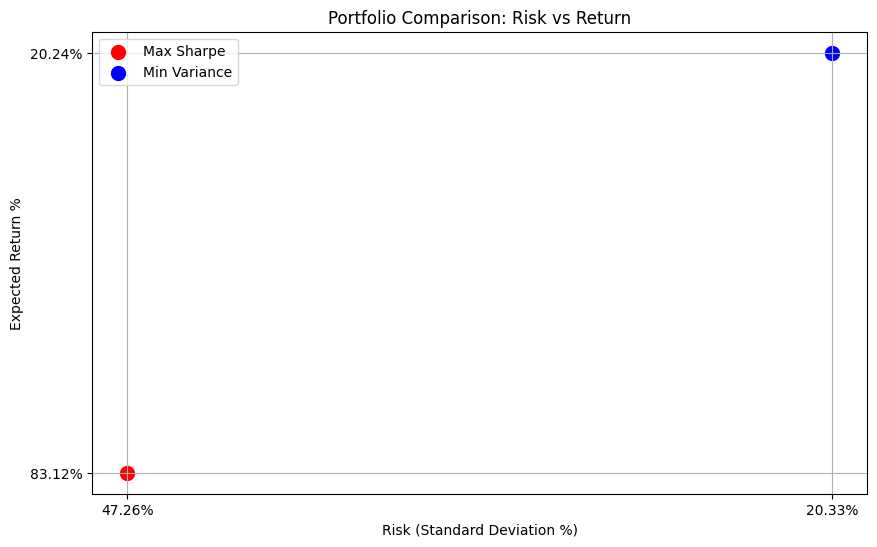

In [51]:

# Extract Max Sharpe metrics
sharpe_return = max_sharpe_metrics.loc['Expected Return', 'Max Sharpe Portfolio']
sharpe_risk = max_sharpe_metrics.loc['Standard Deviation', 'Max Sharpe Portfolio']

# If you also have Min Variance metrics
minvar_return = min_var_metrics.loc['Expected Return', 'Min Var Portfolio']
minvar_risk = min_var_metrics.loc['Standard Deviation', 'Min Var Portfolio']

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(sharpe_risk, sharpe_return, color='red', s=100, label='Max Sharpe')
plt.scatter(minvar_risk, minvar_return, color='blue', s=100, label='Min Variance')
plt.title("Portfolio Comparison: Risk vs Return")
plt.xlabel("Risk (Standard Deviation %)")
plt.ylabel("Expected Return %")
plt.legend()
plt.grid(True)
plt.show()


####Step 4  Minimum Variance Portfolio


Minimum Variance Portfolio Metrics:
                   Min Var Portfolio
Expected Return               20.24%
Standard Deviation            20.33%

Minimum Variance Portfolio Weights:
     Portfolio Weight
AAPL           42.12%
AMZN            0.00%
META            1.46%
MSFT           56.42%
NVDA            0.00%


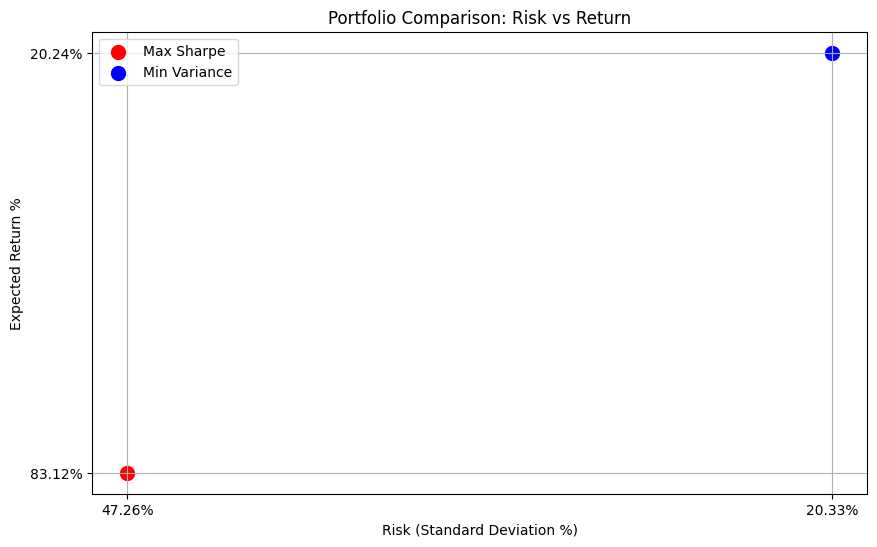

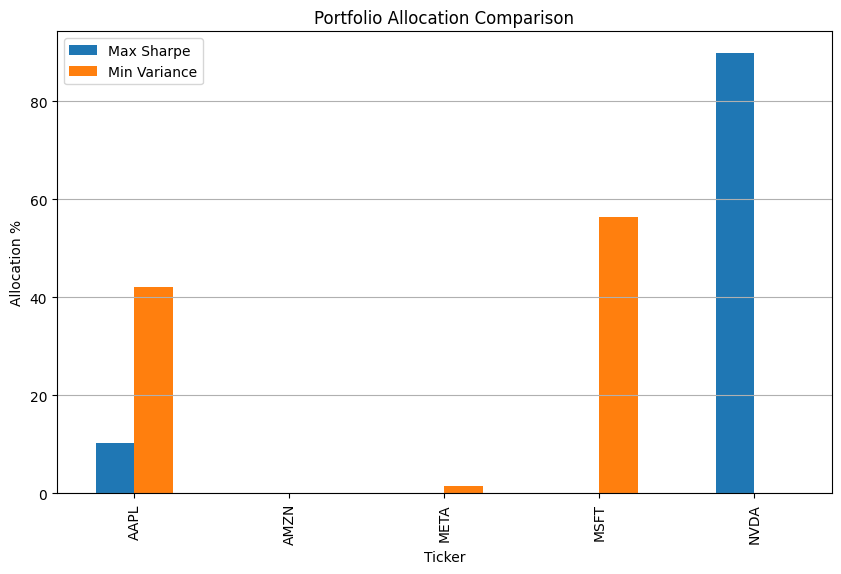

In [52]:

# -----------------------------
# Step 4 — Minimum Variance Portfolio
# -----------------------------

# Compute Min Variance portfolio metrics and weights
min_var_metrics = portfolio.min_var_portfolio('rr')
min_var_weights = portfolio.min_var_portfolio('df')

print("\nMinimum Variance Portfolio Metrics:")
print(min_var_metrics)

print("\nMinimum Variance Portfolio Weights:")
print(min_var_weights)

# -----------------------------
# Visualization
# -----------------------------

# Extract metrics for plotting
minvar_return = min_var_metrics.loc['Expected Return', 'Min Var Portfolio']
minvar_risk = min_var_metrics.loc['Standard Deviation', 'Min Var Portfolio']

# Ensure you have Max Sharpe metrics already
sharpe_return = max_sharpe_metrics.loc['Expected Return', 'Max Sharpe Portfolio']
sharpe_risk = max_sharpe_metrics.loc['Standard Deviation', 'Max Sharpe Portfolio']

# --- Scatter Plot: Risk vs Return ---
plt.figure(figsize=(10,6))
plt.scatter(sharpe_risk, sharpe_return, color='red', s=100, label='Max Sharpe')
plt.scatter(minvar_risk, minvar_return, color='blue', s=100, label='Min Variance')
plt.title("Portfolio Comparison: Risk vs Return")
plt.xlabel("Risk (Standard Deviation %)")
plt.ylabel("Expected Return %")
plt.legend()
plt.grid(True)
plt.show()

# --- Bar Chart: Portfolio Weights ---
# Convert weights to numeric (remove % sign)
weights_plot = pd.concat([
    max_sharpe_weights['Portfolio Weight'].str.rstrip('%').astype(float).rename('Max Sharpe'),
    min_var_weights['Portfolio Weight'].str.rstrip('%').astype(float).rename('Min Variance')
], axis=1)

# Plot numeric data
weights_plot.plot(kind='bar', figsize=(10,6))
plt.title("Portfolio Allocation Comparison")
plt.ylabel("Allocation %")
plt.xlabel("Ticker")
plt.grid(axis='y')
plt.show()


## Visualize the Data

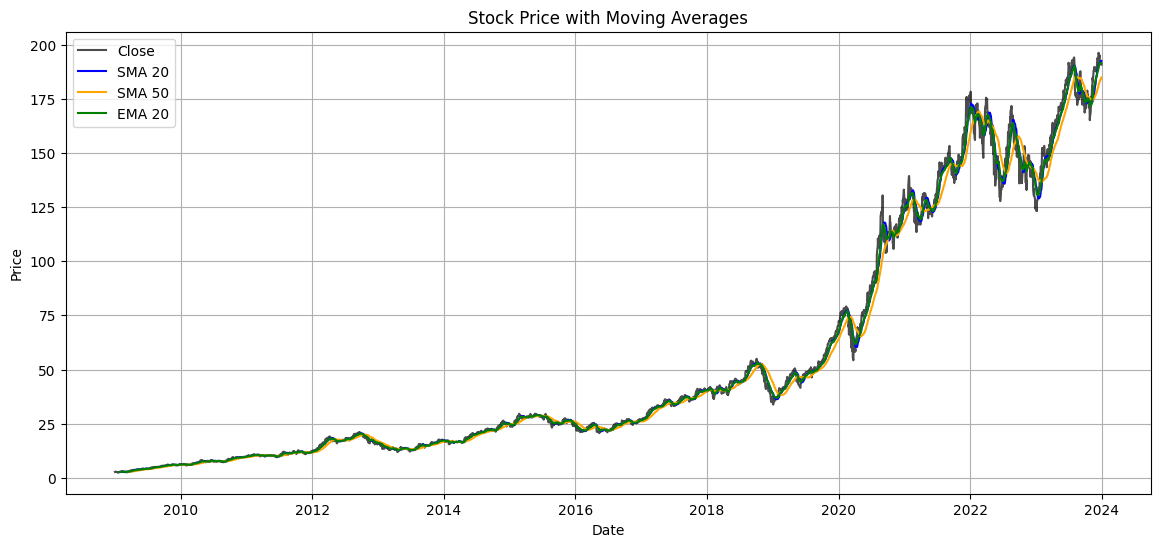

In [54]:
# Plot Stock Close Price and Moving Averages
# Purpose:
  #See short-term vs long-term trends.
  #SMA 20 reacts faster to price changes than SMA 50.
plt.figure(figsize=(14,6))
plt.plot(df_stock['Close'], label='Close', color='black', alpha=0.7)
plt.plot(df_stock['SMA_20'], label='SMA 20', color='blue', linewidth=1.5)
plt.plot(df_stock['SMA_50'], label='SMA 50', color='orange', linewidth=1.5)
plt.plot(df_stock['EMA_20'], label='EMA 20', color='green', linewidth=1.5)
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


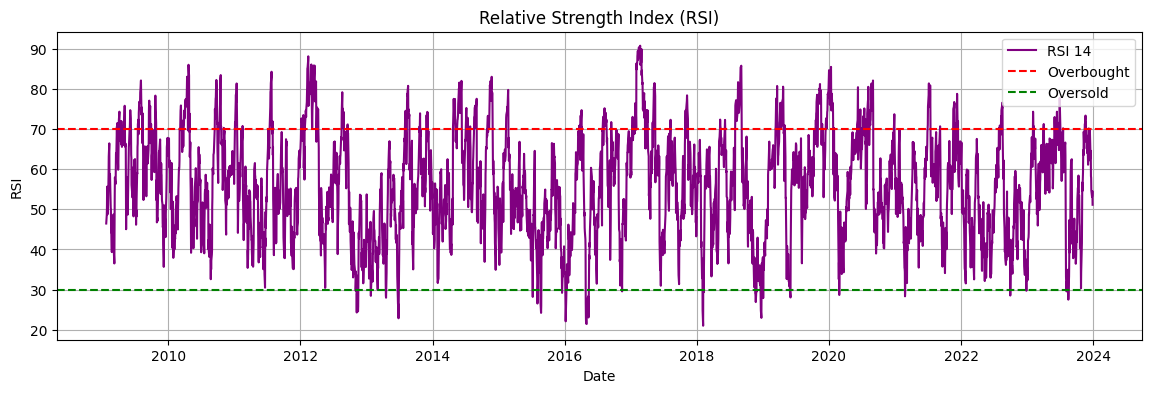

In [55]:
#Plot RSI (Relative Strength Index)
#Purpose:
# RSI shows if the stock is overbought (>70) or oversold (<30).
plt.figure(figsize=(14,4))
plt.plot(df_stock['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


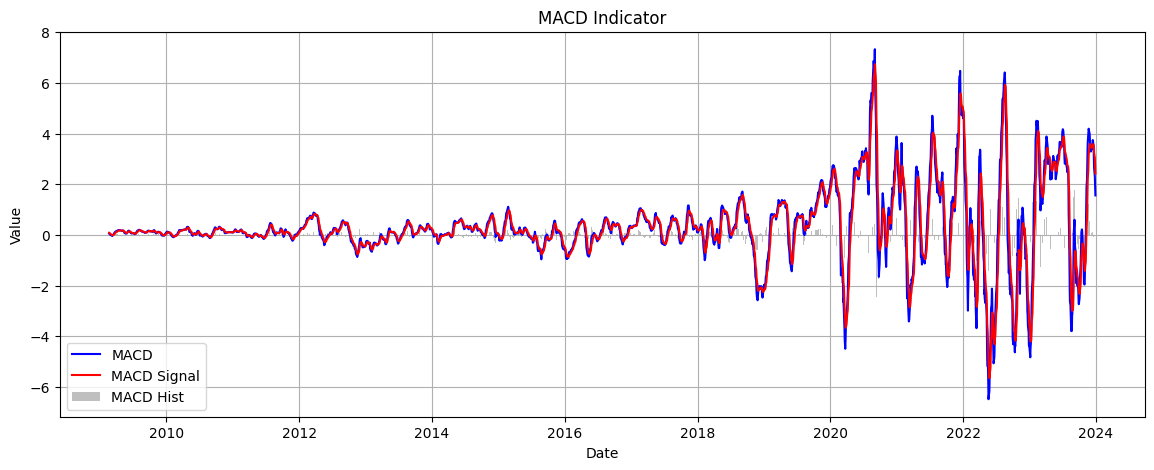

In [56]:
# Plot MACD and Signal Line
# Purpose:
# Shows momentum and trend reversals.
# MACD crossing above signal line → potential buy signal.
# MACD crossing below signal line → potential sell signal.
plt.figure(figsize=(14,5))
plt.plot(df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df_stock.index, df_stock['MACD_hist'], label='MACD Hist', color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


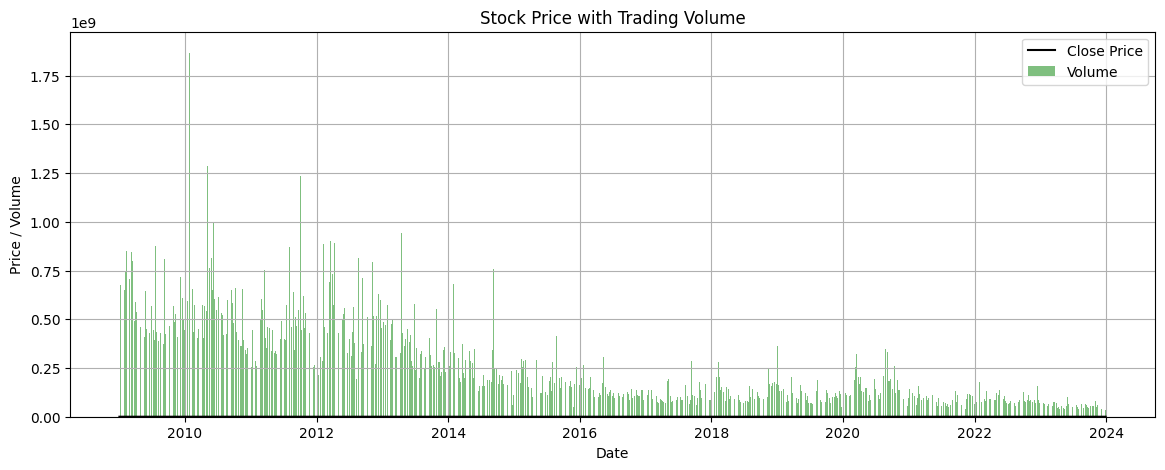

In [58]:
# Volume with Close Price
#Purpose:
# See volume spikes that may confirm price movements.
plt.figure(figsize=(14,5))
plt.bar(df_stock.index, df_stock['Volume'], color='green', alpha=0.5, label='Volume')
plt.plot(df_stock['Close'], label='Close Price', color='black')
plt.title('Stock Price with Trading Volume')
plt.xlabel('Date')
plt.ylabel('Price / Volume')
plt.legend()
plt.grid(True)
plt.show()
